<a href="https://colab.research.google.com/github/xqwu1108-create/MSE1003H_XueqiuWu_1011808741/blob/main/A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Introduction**

# **2.Analysis**

# **2.1 Dataset Research and Loading**

In [5]:
! pip install pymatgen
! pip install mp_api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.1/118.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 6.5 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=43549 sha256=1648f3ba765a87719133717383fd36e9f6e97479cb98fc92a464f52ec04d5c55
  Stored in directory: /root/.cache/pip/wheels/1f/7d/e9/1ff2509f13767a55df1279744adfb757f4ab94b2cbe761f56a
Successfully built bibtexparser
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.3/108.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [13]:
pip install matminer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 20.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import userdata
from mp_api.client import MPRester
from pymatgen.core import Composition
from matminer.featurizers import composition as cf
from matminer.featurizers.conversions import StrToComposition

In [2]:
# Fetch the secret named 'MP_API_KEY'
api_key = userdata.get('MP_API_KEY')

# Check for existence and valid length (32 chars for the new API)
if not api_key:
    print("Error: Could not find 'MP_API_KEY' in Secrets.")
elif len(api_key) != 32:
    print(f"Error: Key length is {len(api_key)}. The new API requires a 32-character key.")
else:
    print("Success: MP_API key retrieved from Secrets.")
# Reset the list INSIDE this cell
    material_data = []

    try:
        # Initialize the Materials Project requester with the environment key
        with MPRester(api_key) as mpr:
            # Search for materials based on specific physical constraints
            # Criteria: Bandgap 0.1-8.0 eV, containing 1 to 4 unique elements
            docs = mpr.materials.summary.search(
                band_gap=(0.1, 8.0),
                num_elements=(1, 4),
                fields=[
                    "material_id", "formula_pretty", "composition",
                    "band_gap", "formation_energy_per_atom", "density",
                    "volume", "nsites", "nelements"
                ]
            )

            print(f"Connection successful. Retrieved {len(docs)} matching entries.")

            # Processing the first 3000 entries for demonstration purposes
            for doc in docs[:3000]:
                material_data.append({
                    'material_id': doc.material_id,
                    'formula': doc.formula_pretty,
                    'composition': str(doc.composition),
                    'bandgap_eV': doc.band_gap,
                    'formation_energy': doc.formation_energy_per_atom,
                    'density_gcc': doc.density,
                    'volume_A3': doc.volume,
                    'n_atoms': doc.nsites,
                    'n_elements': doc.nelements
                })

        # Create structured DataFrame
        df = pd.DataFrame(material_data)

        print("\nData Loading Statistics:")
        print(f"Total entries processed: {len(df)}")
        if not df.empty:
            # Display stats using LaTeX notation in output strings for clarity
            print(f"Bandgap Range: {df['bandgap_eV'].min():.2f} eV to {df['bandgap_eV'].max():.2f} eV")
            print(f"Dataframe Shape: {df.shape}")

            print("\nHead of the processed dataset:")
            print(df.head())

    except Exception as e:
        print(f"An unexpected error occurred: {e}")


Success: MP_API key retrieved from Secrets.


Retrieving SummaryDoc documents:   0%|          | 0/60551 [00:00<?, ?it/s]

Connection successful. Retrieved 60551 matching entries.

Data Loading Statistics:
Total entries processed: 3000
Bandgap Range: 0.10 eV to 7.88 eV
Dataframe Shape: (3000, 9)

Head of the processed dataset:
  material_id formula composition  bandgap_eV  formation_energy  density_gcc  \
0    mp-11107   Ac2O3      Ac2 O3      3.5226         -3.737668     9.109130   
1    mp-32800   Ac2S3    Ac16 S24      2.2962         -2.493064     6.535149   
2   mp-977351   Ac2S3      Ac4 S6      3.0275         -2.440364     5.562971   
3  mp-1183115  AcAlO3  Ac1 Al1 O3      4.1024         -3.690019     8.728230   
4  mp-1183052   AcBO3   Ac1 B1 O3      0.8071         -2.475390     9.206879   

     volume_A3  n_atoms  n_elements  
0    91.511224        5           2  
1  1118.407852       40           2  
2   328.464893       10           2  
3    57.451413        5           3  
4    51.548126        5           3  


# **2.2 Data Preprocessing and Exploratory Data Analysis**

In [3]:
# --- 2. 随机采样测试集 / Randomly select test partition ---
# Randomly select 600 rows from the dataframe for the test partition
test_sample = df.sample(n=min(600, len(df)), random_state=1003)

print(f"Original dataframe size: {len(df)} rows")
print(f"Test partition size: {len(test_sample)} rows")
print(f"Percentage of data selected: {len(test_sample)/len(df)*100:.1f}%")

print(f"\nTest partition bandgap range: {test_sample['bandgap_eV'].min():.2f} - {test_sample['bandgap_eV'].max():.2f} eV")
print(f"Test partition shape: {test_sample.shape}")

# --- 3. 从主数据框中移除测试集 / Remove test_sample from main dataframe ---
# 使用索引移除已选中的测试行，剩下的即为训练/开发集
# Drop the selected test rows by index; the remainder is your training/dev set
df_remaining = df.drop(test_sample.index)

print(f"\nRemaining dataframe size after removing test partition: {len(df_remaining)} rows")
print(f"Rows removed: {len(df) - len(df_remaining)} rows")
print(f"Remaining dataframe shape: {df_remaining.shape}")

# --- 4. 验证无重叠 / Verify no overlap ---
# 确保两个集合之间没有交集，保证评估的公正性
# Ensure there's no intersection between sets to maintain evaluation integrity
assert len(set(df_remaining.index).intersection(set(test_sample.index))) == 0, "Overlap found!"
print("✔ Successfully removed test partition - no overlap detected")

# 重置索引以便后续处理 / Reset index for clean downstream processing
train_df = df_remaining.reset_index(drop=True)
test_df = test_sample.reset_index(drop=True)

Original dataframe size: 3000 rows
Test partition size: 600 rows
Percentage of data selected: 20.0%

Test partition bandgap range: 0.11 - 7.56 eV
Test partition shape: (600, 9)

Remaining dataframe size after removing test partition: 2400 rows
Rows removed: 600 rows
Remaining dataframe shape: (2400, 9)
✔ Successfully removed test partition - no overlap detected


In [4]:
# Train Data preprocessing and EDA
print("Train Dataset Information:")
# Check data types, non-null counts, and memory usage
print(train_df.info())
print("\nSummary Statistics:")
# Display stats (mean, std, quartiles, etc.)
print(train_df.describe())
print("\nMissing values per column:")
# Count null values in each column
print(train_df.isnull().sum())

Train Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   material_id       2400 non-null   object 
 1   formula           2400 non-null   object 
 2   composition       2400 non-null   object 
 3   bandgap_eV        2400 non-null   float64
 4   formation_energy  2400 non-null   float64
 5   density_gcc       2400 non-null   float64
 6   volume_A3         2400 non-null   float64
 7   n_atoms           2400 non-null   int64  
 8   n_elements        2400 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 168.9+ KB
None

Summary Statistics:
        bandgap_eV  formation_energy  density_gcc     volume_A3      n_atoms  \
count  2400.000000       2400.000000  2400.000000   2400.000000  2400.000000   
mean      2.363366         -1.740927     4.410274    663.893518    36.844167   
std       1.632813  

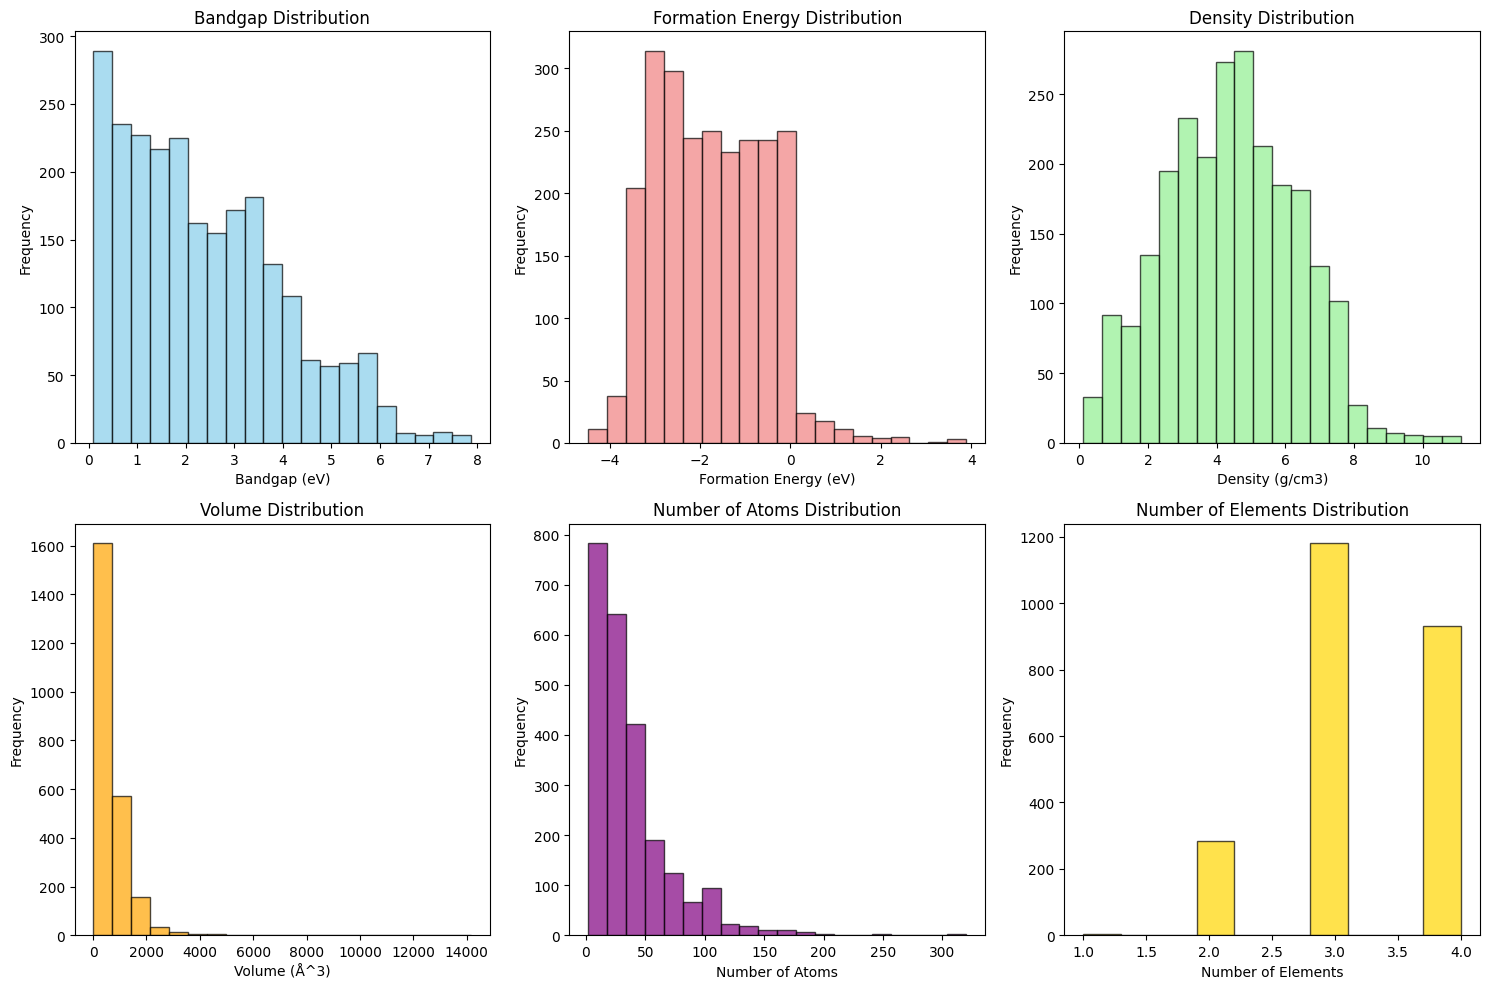

In [5]:
# --- 2. 数据分布可视化 / Visualize Train Data Distributions ---
# 创建一个 2行3列 的画布 / Create a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# [0,0] 带隙分布（目标变量）/ Bandgap distribution (target variable)
axes[0,0].hist(train_df['bandgap_eV'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Bandgap Distribution')
axes[0,0].set_xlabel('Bandgap (eV)')
axes[0,0].set_ylabel('Frequency')

# [0,1] 形成能分布 / Formation energy distribution
axes[0,1].hist(train_df['formation_energy'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Formation Energy Distribution')
axes[0,1].set_xlabel('Formation Energy (eV)')
axes[0,1].set_ylabel('Frequency')

# [0,2] 密度分布 / Density distribution
axes[0,2].hist(train_df['density_gcc'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,2].set_title('Density Distribution')
axes[0,2].set_xlabel('Density (g/cm3)')
axes[0,2].set_ylabel('Frequency')

# [1,0] 体积分布 / Volume distribution
axes[1,0].hist(train_df['volume_A3'], bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[1,0].set_title('Volume Distribution')
axes[1,0].set_xlabel('Volume (Å^3)')
axes[1,0].set_ylabel('Frequency')

# [1,1] 原子数量分布 / Number of atoms distribution
axes[1,1].hist(train_df['n_atoms'], bins=20, alpha=0.7, color='purple', edgecolor='black')
axes[1,1].set_title('Number of Atoms Distribution')
axes[1,1].set_xlabel('Number of Atoms')
axes[1,1].set_ylabel('Frequency')

# [1,2] 元素种类分布 / Number of elements distribution
axes[1,2].hist(train_df['n_elements'], bins=10, alpha=0.7, color='gold', edgecolor='black')
axes[1,2].set_title('Number of Elements Distribution')
axes[1,2].set_xlabel('Number of Elements')
axes[1,2].set_ylabel('Frequency')

plt.tight_layout() # 自动调整子图间距 / Adjust layout to prevent overlap
plt.show()

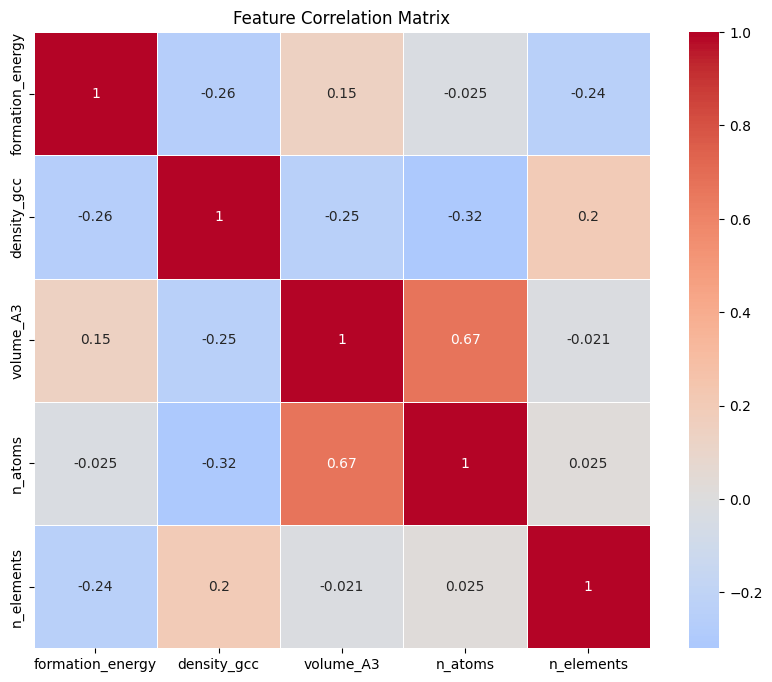

In [6]:
# Correlation Matrix
plt.figure(figsize=(10, 8))

# 自动筛选数值型列 / Automatically select numerical columns
numeric_cols = train_df.select_dtypes(include=[np.number]).columns

# 按照 Screenshot 6 的要求，在分析特征间相关性时剔除目标变量
# Remove the target variable to analyze feature-only correlation
numeric_cols_for_corr = numeric_cols.drop('bandgap_eV')

# 计算相关系数矩阵 / Calculate correlation matrix
correlation_matrix = train_df[numeric_cols_for_corr].corr()

# 使用热力图可视化相关性 / Visualize with a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# **2.3 Feature Engineering with Materials Informatics**

In [7]:
# --- 2. 准备特征提取副本 / Prepare a working copy for featurization ---
# 使用 train_df 的副本进行特征工程，避免修改原始数据
# Create a copy of train_df to avoid modifying the original training data
feature_df = train_df.copy()

# --- 3. 将成分字符串转换为 pymatgen 对象 / Convert strings to Composition objects ---
# ML 模型无法直接处理 "Ac2O3" 字符串，需要先转换为 pymatgen 对象
# Models cannot handle "Ac2O3" strings directly; they must be converted to objects
stc = StrToComposition(target_col_id='composition_obj')
# featurize_dataframe 会在 df 中新增一列 'composition_obj'
feature_df = stc.featurize_dataframe(feature_df, "composition")

print(f"Dataset shape after composition conversion: {feature_df.shape}")

# --- 4. 初始化选定的特征提取器 / Initialize selected featurizers ---
# 选取几个经典的特征描述符，平衡模型精度与计算复杂度
# Selected key descriptors to balance model accuracy and computational complexity
featurizers = [
    cf.ElementProperty.from_preset("magpie"), # 提取元素的物理/化学属性 (如原子半径、电负性) / Elemental properties
    cf.Stoichiometry(),                      # 提取化学计量的统计特征 (如原子数占比) / Stoichiometric features
    cf.ElementFraction(),                    # 提取每个元素在材料中的分数 / Element fraction features
    cf.TMetalFraction(),                     # 提取过渡金属的占比 / Transition metal fraction
]

# --- 5. 逐个应用特征提取器 / Apply featurizers one by one ---
print("Applying featurizers...")

for i, featurizer in enumerate(featurizers):
    try:
        # 打印当前进度和正在运行的提取器类名
        print(f"Applying featurizer {i+1}/{len(featurizers)}: {featurizer.__class__.__name__}")

        # 将特征添加到 feature_df 中，忽略提取过程中的个别错误
        # Add features to dataframe, use ignore_errors=True to skip problematic entries
        feature_df = featurizer.featurize_dataframe(feature_df, col_id="composition_obj", ignore_errors=True)

        print(f"Shape after {featurizer.__class__.__name__}: {feature_df.shape}")
    except Exception as e:
        print(f"Error with featurizer {featurizer.__class__.__name__}: {e}")
        continue

print(f"Final dataset shape after featurization: {feature_df.shape}")

# --- 6. 清理并提取特征矩阵 / Clean and extract feature matrix ---
# 移除原始的字符串和对象列，只保留数值型特征
# Remove non-numeric columns like formula strings and composition objects
non_feature_cols = ['composition', 'pretty_formula', 'composition_obj', 'material_id', 'formula']
# 筛选出所有数值类型的列 / Select columns with numerical data types
feature_cols = [col for col in feature_df.columns if col not in non_feature_cols]
numeric_features = feature_df[feature_cols].select_dtypes(include=[np.number])

print(f"Number of numeric features: {numeric_features.shape[1]}")

# --- 7. 数据清洗：处理无效值 / Clean the dataset: Handle inf and NaN ---
# 机器学习模型无法处理无穷大或缺失值，此处用中位数填充
# ML models cannot handle infinite or missing values; fill them with median
numeric_features = numeric_features.replace([np.inf, -np.inf], np.nan)
numeric_features = numeric_features.fillna(numeric_features.median())

# --- 8. 划分目标变量和特征矩阵 / Separate target and features ---
# 目标变量 y 为带隙，特征矩阵 X 为其余所有数值特征
# Target y is the bandgap; feature matrix X includes all other numerical descriptors
y = numeric_features['bandgap_eV'].copy()
X = numeric_features.drop(['bandgap_eV'], axis=1)

print(f"Target variable shape: {y.shape}")
print(f"Feature matrix shape: {X.shape}")
# 显示前 10 个提取出的物理特征名称 / Show names of the first 10 descriptors
print(f"Sample features: {list(X.columns[:10])}")

StrToComposition:   0%|          | 0/2400 [00:00<?, ?it/s]

Dataset shape after composition conversion: (2400, 10)
Applying featurizers...
Applying featurizer 1/4: ElementProperty


ElementProperty:   0%|          | 0/2400 [00:00<?, ?it/s]

Shape after ElementProperty: (2400, 142)
Applying featurizer 2/4: Stoichiometry


Stoichiometry:   0%|          | 0/2400 [00:00<?, ?it/s]

Shape after Stoichiometry: (2400, 148)
Applying featurizer 3/4: ElementFraction


ElementFraction:   0%|          | 0/2400 [00:00<?, ?it/s]

Shape after ElementFraction: (2400, 266)
Applying featurizer 4/4: TMetalFraction


TMetalFraction:   0%|          | 0/2400 [00:00<?, ?it/s]

Shape after TMetalFraction: (2400, 267)
Final dataset shape after featurization: (2400, 267)
Number of numeric features: 263
Target variable shape: (2400,)
Feature matrix shape: (2400, 262)
Sample features: ['formation_energy', 'density_gcc', 'volume_A3', 'n_atoms', 'n_elements', 'MagpieData minimum Number', 'MagpieData maximum Number', 'MagpieData range Number', 'MagpieData mean Number', 'MagpieData avg_dev Number']


In [35]:
# --- 1. Initialize and Prepare Test Data ---
# Create a copy of the test dataframe to ensure the original raw data remains untouched
test_feature_df = test_df.copy()

# --- 2. Convert Composition Strings to Objects ---
# Use the StrToComposition (stc) featurizer to convert chemical formula strings
# (e.g., "GaN") into pymatgen Composition objects, which are required for further analysis.
test_feature_df = stc.featurize_dataframe(test_feature_df, "composition")

print(f"Test dataset shape after composition conversion: {test_feature_df.shape}")

# --- 3. Apply Training Featurizers to Test Data ---
# Iteratively apply the same list of featurizers used for the training set.
# This ensures the feature space of the test set is identical to the training set.
print("Applying featurizers to test data...")

for i, featurizer in enumerate(featurizers):
    try:
        # Display progress and the name of the current featurizer class
        print(f"Applying featurizer {i+1}/{len(featurizers)}: {featurizer.__class__.__name__}")

        # Extract features based on the "composition_obj" column.
        # ignore_errors=True is used to skip individual rows that might fail without crashing the loop.
        test_feature_df = featurizer.featurize_dataframe(test_feature_df, col_id="composition_obj", ignore_errors=True)

        print(f"Shape after {featurizer.__class__.__name__}: {test_feature_df.shape}")
    except Exception as e:
        # Catch and report any catastrophic errors specific to a featurizer
        print(f"Error with featurizer {featurizer.__class__.__name__}: {e}")
        continue

print(f"Final test dataset shape after featurization: {test_feature_df.shape}")

# --- 4. Feature Extraction and Selection ---
# Extract only the columns that were defined during the training phase.
# .select_dtypes(include=[np.number]) ensures we only keep numeric columns for the model.
test_numeric_features = test_feature_df[feature_cols].select_dtypes(include=[np.number])

# --- 5. Data Cleaning: Handling Infinities and NaNs ---
# Replace positive and negative infinity values (often caused by division by zero in descriptors) with NaN.
test_numeric_features = test_numeric_features.replace([np.inf, -np.inf], np.nan)

# Fill missing values (NaN) using the median of the current column.
# This is a critical step for models that cannot handle null inputs.
test_numeric_features = test_numeric_features.fillna(test_numeric_features.median())

# --- 6. Separate Target and Features ---
# Extract the ground truth target variable ('bandgap_ev') for final evaluation.
y_test_true = test_numeric_features['bandgap_eV'].copy()
X_test_raw = test_numeric_features.drop(['bandgap_eV'], axis=1)

# Drop the target column from the feature matrix to prevent data leakage.
X_test_features = test_numeric_features.drop(['bandgap_eV'], axis=1)

print(f"Test target variable shape: {y_test_true.shape}")
print(f"Test feature matrix shape: {X_test_features.shape}")
print("Test data featurization complete")

StrToComposition:   0%|          | 0/600 [00:00<?, ?it/s]

Test dataset shape after composition conversion: (600, 10)
Applying featurizers to test data...
Applying featurizer 1/4: ElementProperty


ElementProperty:   0%|          | 0/600 [00:00<?, ?it/s]

Shape after ElementProperty: (600, 142)
Applying featurizer 2/4: Stoichiometry


Stoichiometry:   0%|          | 0/600 [00:00<?, ?it/s]

Shape after Stoichiometry: (600, 148)
Applying featurizer 3/4: ElementFraction


ElementFraction:   0%|          | 0/600 [00:00<?, ?it/s]

Shape after ElementFraction: (600, 266)
Applying featurizer 4/4: TMetalFraction


TMetalFraction:   0%|          | 0/600 [00:00<?, ?it/s]

Shape after TMetalFraction: (600, 267)
Final test dataset shape after featurization: (600, 267)
Test target variable shape: (600,)
Test feature matrix shape: (600, 262)
Test data featurization complete


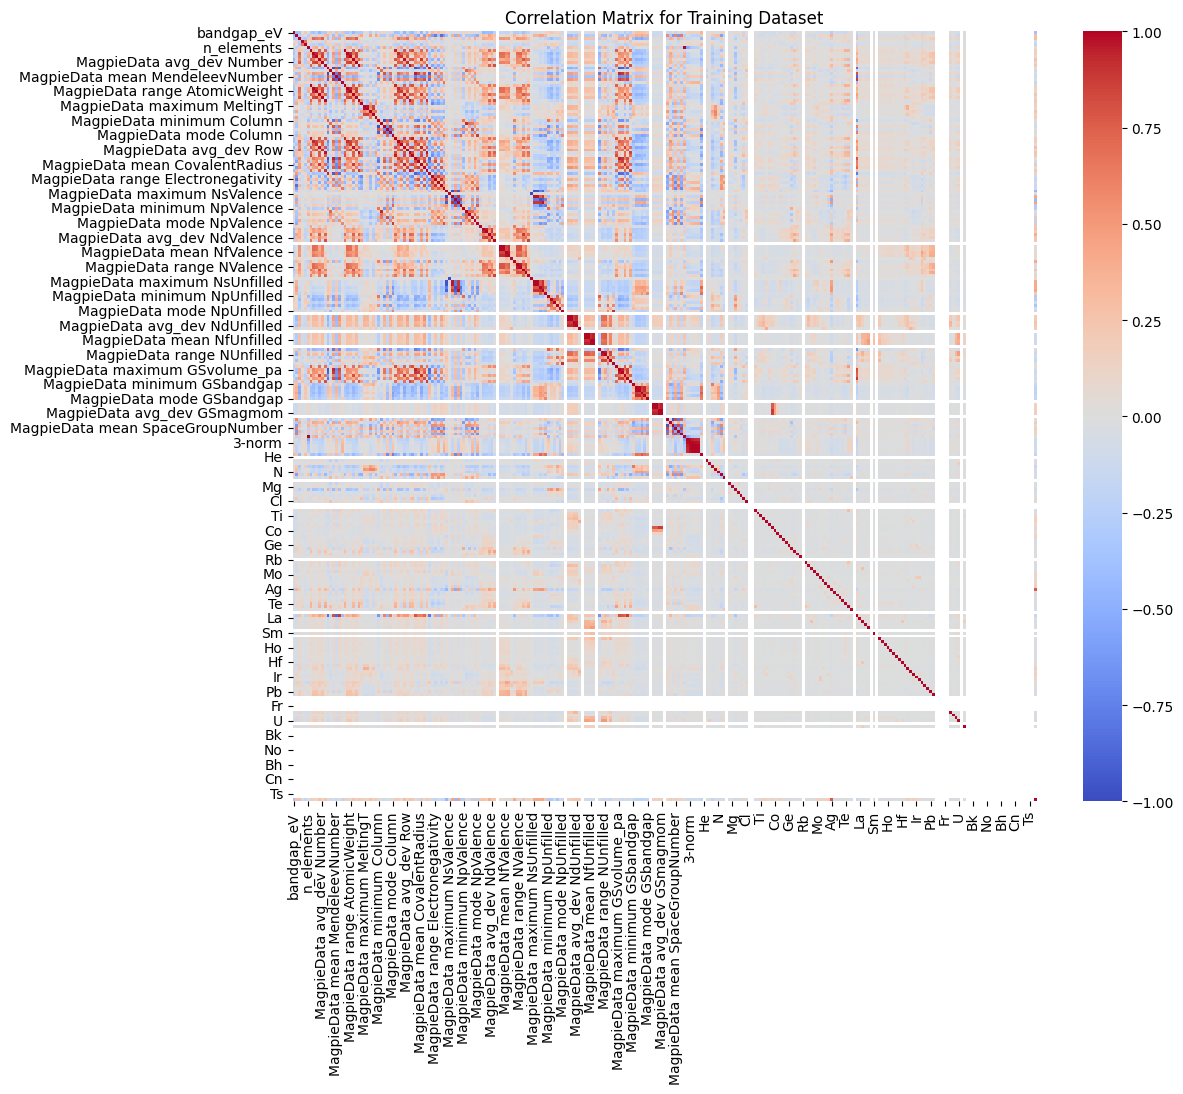


Highest correlations with bandgap_eV:
bandgap_eV                           1.000000
MagpieData mean Row                  0.476448
MagpieData mean CovalentRadius       0.451637
MagpieData mean Number               0.447946
MagpieData mean AtomicWeight         0.438877
MagpieData maximum NdValence         0.438561
MagpieData avg_dev NdValence         0.436316
MagpieData minimum CovalentRadius    0.423174
MagpieData mean NdValence            0.420331
MagpieData mode CovalentRadius       0.399672
Name: bandgap_eV, dtype: float64


In [8]:
# Feature Correlation Matrix
plt.figure(figsize=(12, 10))
# 计算所有特征之间的相关系数 / Calculate correlation matrix
correlation_matrix = numeric_features.corr()

# 绘制热力图以检查特征间是否存在过高的相关性（多重共线性）
# Draw heatmap to check for multicollinearity between features
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Training Dataset')
plt.show()

# --- 9. 寻找与带隙相关性最强的特征 / Highest correlations with bandgap ---
print("\nHighest correlations with bandgap_eV:")
# 计算所有特征与带隙的相关性绝对值并排序
# Sort features by absolute correlation with the target
bandgap_correlations = correlation_matrix['bandgap_eV'].abs().sort_values(ascending=False)
print(bandgap_correlations.head(10))

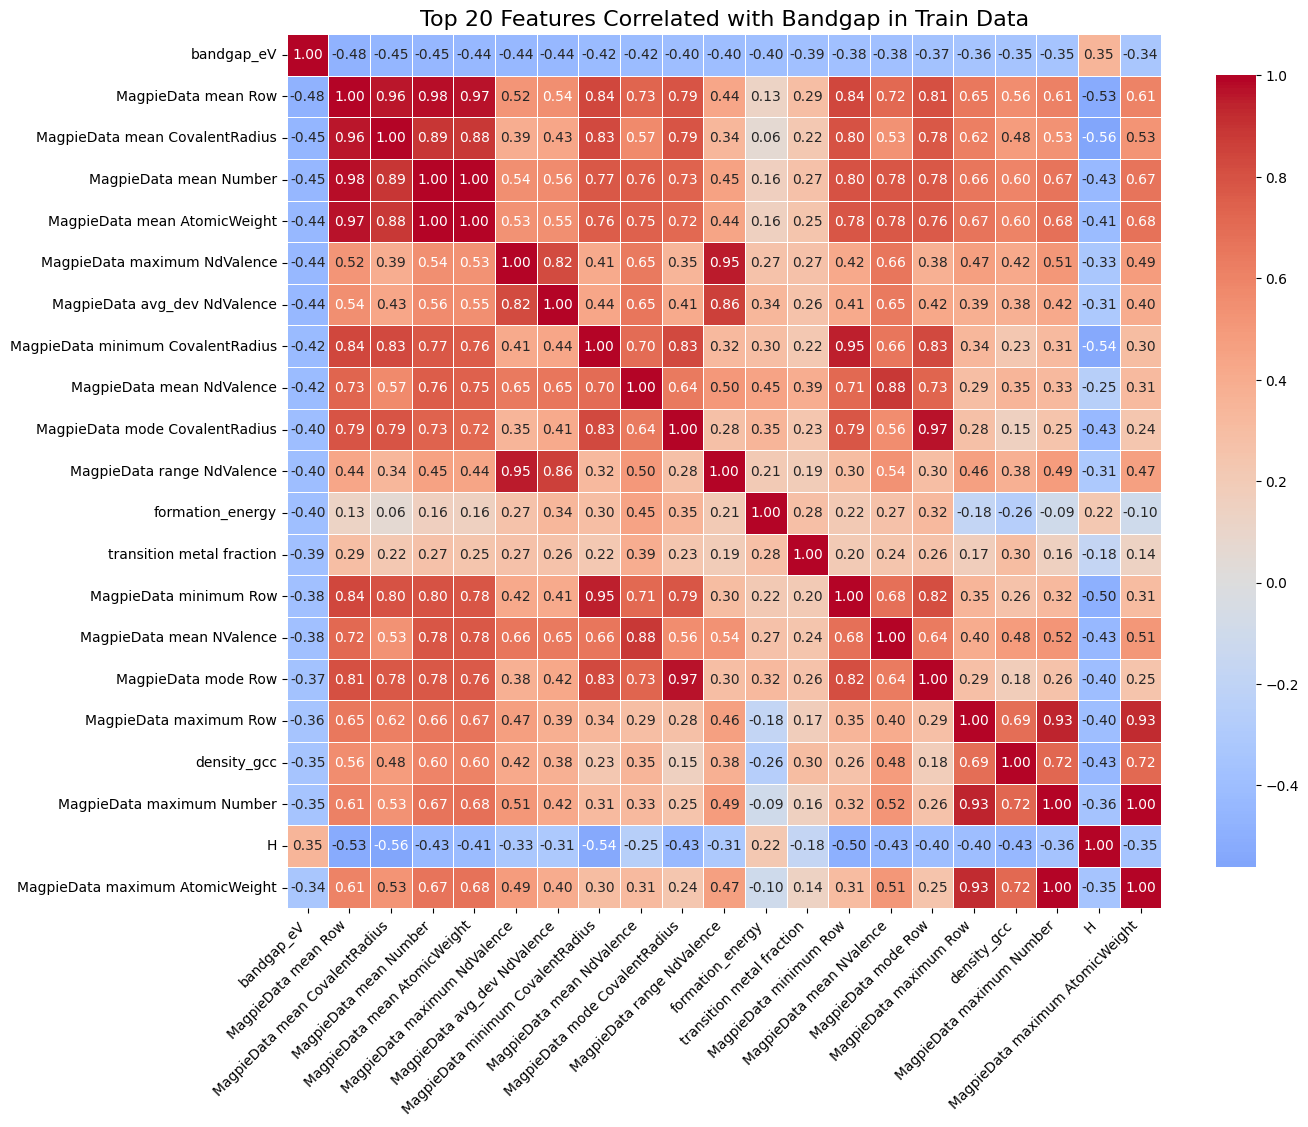


Highest correlations with bandgap_eV:
bandgap_eV                           1.000000
MagpieData mean Row                  0.476448
MagpieData mean CovalentRadius       0.451637
MagpieData mean Number               0.447946
MagpieData mean AtomicWeight         0.438877
MagpieData maximum NdValence         0.438561
MagpieData avg_dev NdValence         0.436316
MagpieData minimum CovalentRadius    0.423174
MagpieData mean NdValence            0.420331
MagpieData mode CovalentRadius       0.399672
Name: bandgap_eV, dtype: float64


In [13]:
# --- 1. Identify the top 20 most correlated features / 筛选相关性最高的前20个特征 ---
# Calculate the absolute correlation with the target variable 'bandgap_eV'
# 这里的目的是找到与带隙相关性绝对值最大的特征（正相关或负相关都重要）
target_corr = numeric_features.corr()['bandgap_eV'].abs().sort_values(ascending=False)

# Select the top 20 features (excluding 'bandgap_eV' itself at index 0)
# 取前21个，因为第1个通常是 bandgap_eV 自身 (相关性为 1.0)
top_20_features = target_corr.head(21).index

# --- 2. Create the filtered correlation matrix / 创建筛选后的相关系数矩阵 ---
# Filter the dataframe to only include these top 20 descriptors + target
filtered_corr_matrix = numeric_features[top_20_features].corr()

# --- 3. Plot the Heatmap / 绘制精简版热图 ---
plt.figure(figsize=(14, 12))

# Using 'annot=True' to show values since we only have 20 columns now
# 因为现在只有20列，我们可以开启标注 (annot) 来直接读取数值
sns.heatmap(
    filtered_corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

plt.title('Top 20 Features Correlated with Bandgap in Train Data', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability / 旋转标签方便阅读
plt.tight_layout()
plt.show()

# --- 9. 寻找与带隙相关性最强的特征 / Highest correlations with bandgap ---
print("\nHighest correlations with bandgap_eV:")
# 计算所有特征与带隙的相关性绝对值并排序
# Sort features by absolute correlation with the target
bandgap_correlations = correlation_matrix['bandgap_eV'].abs().sort_values(ascending=False)
print(bandgap_correlations.head(10))

# **2.4 Dimensionality Reduction**

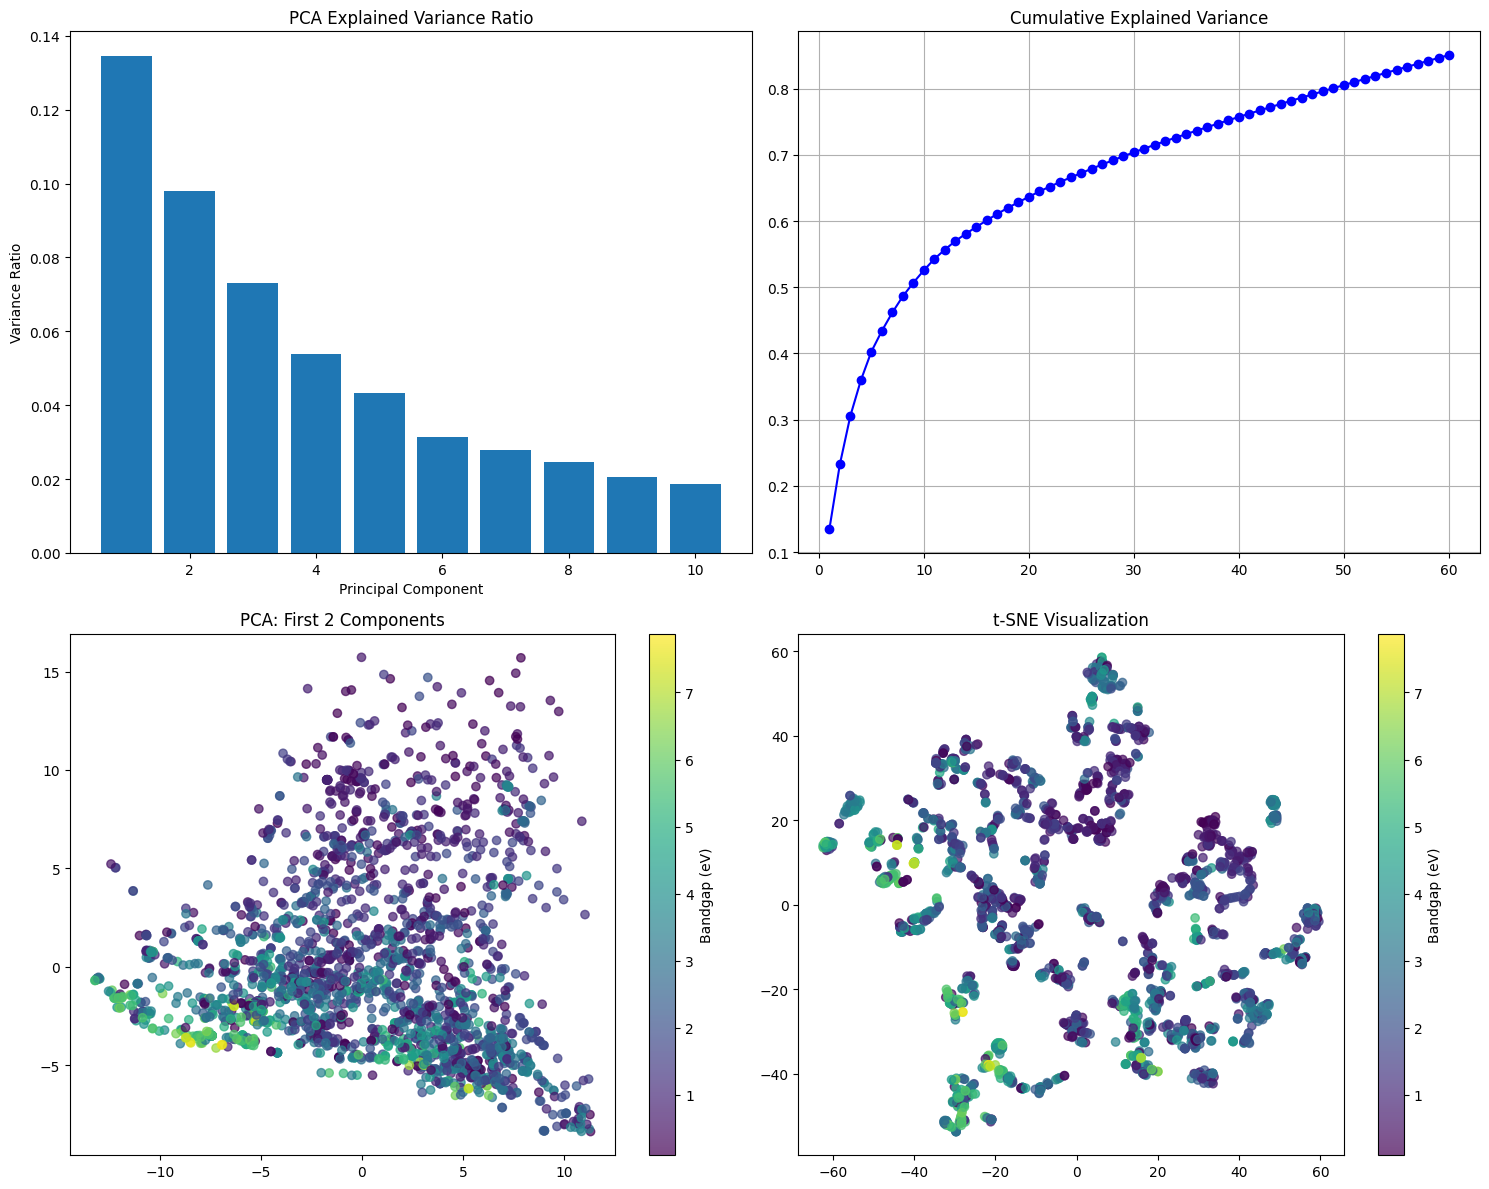


Using PCA-reduced features with 60 components for modeling


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# --- 1. 标准化 / Standardization ---
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. 主成分分析 (PCA) / Principal Component Analysis ---
# 尝试保留前 20 个主成分，用于观察方差保留情况
n_components = min(60, X.shape[0]-1)
pca = PCA(n_components=n_components, random_state=1003)
X_pca = pca.fit_transform(X_scaled)

# --- 3. t-SNE 可视化 / t-SNE for Visualization ---
# 只有在样本量足够时才运行（t-SNE 适合展示局部结构）
if X.shape[0] > 30:
    # perplexity 调整局部 vs 全局的平衡，通常设为样本量的根号或更小
    tsne = TSNE(n_components=2, random_state=1003, perplexity=min(30, X.shape[0]//3))
    # 使用 PCA 的前 10 个主成分作为输入，可以加速计算并减少噪声
    X_tsne = tsne.fit_transform(X_pca[:, :min(10, n_components)])
else:
    X_tsne = None

# --- 4. 结果可视化 / Visualizing Results ---
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 绘制 PCA 方差保留比例
# Bar plot for individual explained variance
axes[0,0].bar(range(1, len(pca.explained_variance_ratio_[:10])+1), pca.explained_variance_ratio_[:10])
axes[0,0].set_title('PCA Explained Variance Ratio')
axes[0,0].set_xlabel('Principal Component')
axes[0,0].set_ylabel('Variance Ratio')

# 绘制累积方差曲线 / Cumulative explained variance plot
cumsum_var = np.cumsum(pca.explained_variance_ratio_)
axes[0,1].plot(range(1, len(cumsum_var)+1), cumsum_var, 'bo-')
axes[0,1].set_title('Cumulative Explained Variance')
axes[0,1].grid(True)

# 绘制 PCA 二维投影（颜色深浅代表带隙大小）
# PCA scatter plot colored by Bandgap
scatter = axes[1,0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[1,0].set_title('PCA: First 2 Components')
plt.colorbar(scatter, ax=axes[1,0], label='Bandgap (eV)')

# 绘制 t-SNE 投影
if X_tsne is not None:
    scatter2 = axes[1,1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
    axes[1,1].set_title('t-SNE Visualization')
    plt.colorbar(scatter2, ax=axes[1,1], label='Bandgap (eV)')

plt.tight_layout()
plt.show()

# Use PCA features for further analysis ---
X_reduced = X_pca
print(f"\nUsing PCA-reduced features with {X_reduced.shape[1]} components for modeling")

Searching for the optimal k value...
Optimal k determined: 22


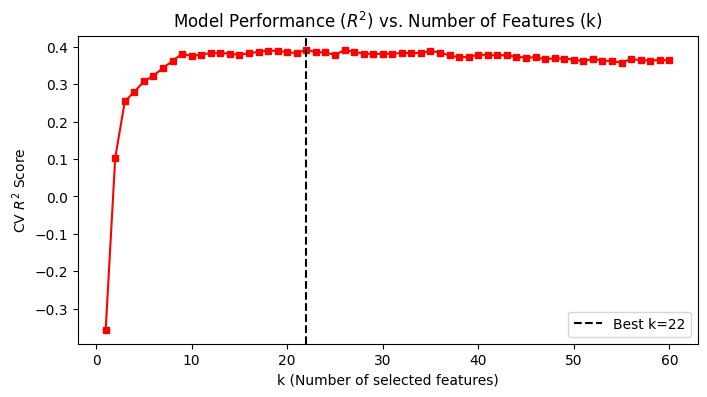

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
# Section: 寻找最优 k (Optimizing k via CV)
print("Searching for the optimal k value...")
k_values = range(1, 61)
cv_scores = []

for k in k_values:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_tmp = selector.fit_transform(X_reduced, y)

    # 交叉验证评估准确率 | CV for accuracy
    model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
    scores = cross_val_score(model, X_tmp, y, cv=5, scoring='r2')
    cv_scores.append(scores.mean())

optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal k determined: {optimal_k}")

# 绘制 k 优化曲线 | Plot k-optimization curve
plt.figure(figsize=(8, 4))
plt.plot(k_values, cv_scores, 'rs-', markersize=4)
plt.axvline(x=optimal_k, color='k', linestyle='--', label=f'Best k={optimal_k}')
plt.title('Model Performance ($R^2$) vs. Number of Features (k)')
plt.xlabel('k (Number of selected features)')
plt.ylabel('CV $R^2$ Score')
plt.legend()
plt.show()

# **2.5 Feature Selection**

Original PCA features: 60
Selected features: 22
Feature scores for PCA components (top 22):
PC1: 242.09
PC2: 398.96
PC5: 102.00
PC6: 12.03
PC7: 166.03
PC8: 8.29
PC9: 16.35
PC10: 6.11
PC11: 107.16
PC12: 30.45
PC13: 18.72
PC14: 3.25
PC15: 9.55
PC21: 9.76
PC23: 3.82
PC24: 7.68
PC26: 7.54
PC27: 9.46
PC34: 4.20
PC35: 3.34
PC36: 6.93
PC50: 10.23


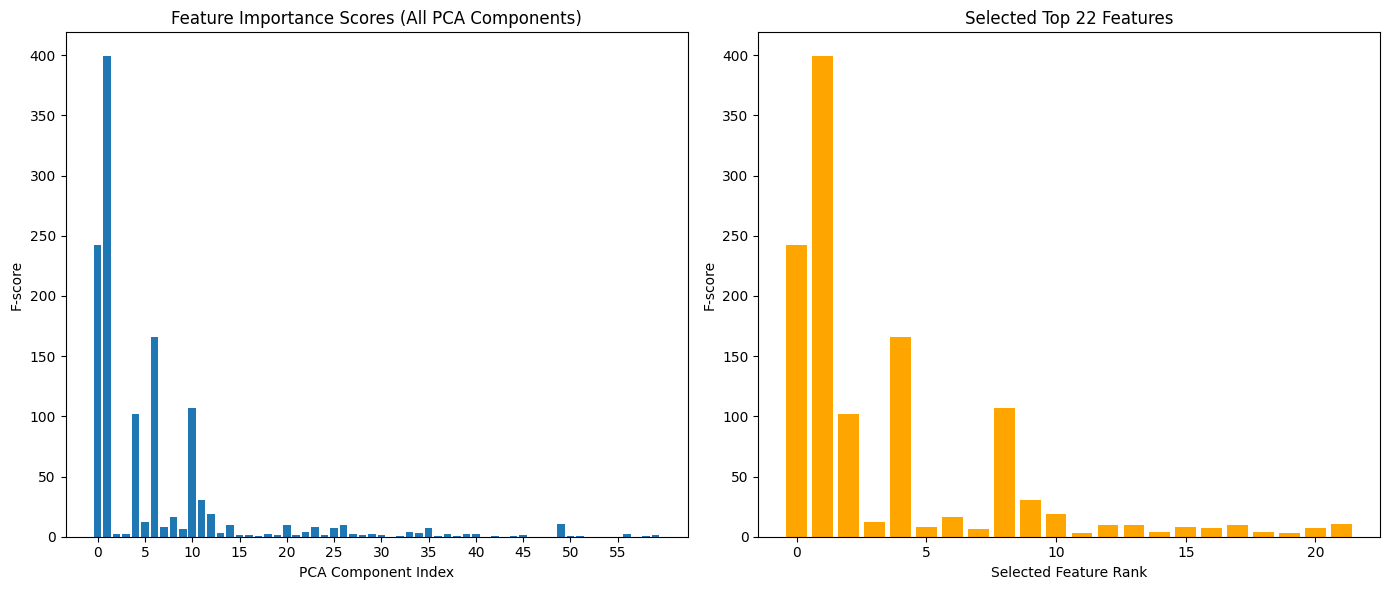


Final feature matrix shape: (2400, 22)


In [27]:
from sklearn.feature_selection import SelectKBest, f_regression

# --- 1. 执行特征选择 | Perform Feature Selection ---
# 我们在之前的实验中通过 R² 曲线发现 k=22 时模型性能最佳。
# We found in previous experiments that k=22 yields the best R² performance.
optimal_k = 22
# 确保 k 值不会超过特征总数。
# Ensure k does not exceed the total number of features.
k_best = min(optimal_k, X_reduced.shape[1])

# 使用 SelectKBest，并以 f_regression 为评分函数。
# Initialize SelectKBest using f_regression as the scoring function.
selector = SelectKBest(score_func=f_regression, k=k_best)

# 在 PCA 降维后的数据集 X_reduced 上拟合模型并转换数据。
# 关键点：此操作仅筛选特征（列），2400 个样本（行）会全部保留。
# Fit the selector to X_reduced and transform. All 2400 samples are kept.
X_selected = selector.fit_transform(X_reduced, y)

print(f"Original PCA features: {X_reduced.shape[1]}") # 原始 PCA 特征数量 (通常为 60)
print(f"Selected features: {X_selected.shape[1]}")    # 筛选后的特征数量 (22)

# --- 2. 获取特征得分 | Get Feature Importance Scores ---
# 获取所有主成分的 F 得分。
# Retrieve raw F-scores for all PCA components.
feature_scores = selector.scores_
# 获取布尔掩码，标识哪些特征被选中了。
# Get a boolean mask for the selected features.
selected_features = selector.get_support()

print(f"Feature scores for PCA components (top {k_best}):")
# 获取被选中的特征索引。
# Get the actual indices of the selected features.
selected_indices = np.where(selected_features)[0]

# 遍历并打印选中的主成分 (PC) 及其得分。
# Loop through and print selected PC indices and their scores.
for i, (idx, score) in enumerate(zip(selected_indices, feature_scores[selected_features])):
    # idx+1 是为了使 PC 编号更符合直觉。
    # Use idx+1 to make PC numbering more intuitive.
    print(f"PC{idx+1}: {score:.2f}")

# --- 3. 可视化特征重要性 | Visualize Feature Importance ---
plt.figure(figsize=(14, 6))

# 子图 1: 展示所有主成分的得分对比
# Subplot 1: Comparing scores of all PCA components
plt.subplot(1, 2, 1)
plt.bar(range(len(feature_scores)), feature_scores)
plt.title('Feature Importance Scores (All PCA Components)')
plt.xlabel('PCA Component Index')
plt.ylabel('F-score')
# 设置横坐标刻度步长，方便阅读
plt.xticks(range(0, len(feature_scores), 5))

# 子图 2: 专门展示被选中的 22 个特征
# Subplot 2: Visualizing the top 22 selected features
plt.subplot(1, 2, 2)
selected_scores = feature_scores[selected_features]
plt.bar(range(len(selected_scores)), selected_scores, color='orange')
plt.title(f'Selected Top {k_best} Features')
plt.xlabel('Selected Feature Rank')
plt.ylabel('F-score')

plt.tight_layout()
plt.show()

print(f"\nFinal feature matrix shape: {X_selected.shape}")

# **2.6 Cross-Validation Strategy and Model Training**

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Split data into training and validation sets ---
# Using X_selected (the 22 optimal features identified earlier).
X_train, X_val, y_train, y_val = train_test_split(
    X_selected, y, test_size=0.2, random_state=1003
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_val.shape}")

# --- Define Random Forest Regressor with hyperparameter tuning ---
# --- 定义带超参数调优的随机森林回归器 ---
rf_regressor = RandomForestRegressor(random_state=1003)

# --- Hyperparameter grid for tuning ---
# --- 用于调优的超参数网格 ---
param_grid = {
    'n_estimators': [50, 100, 200],      # 树的数量
    'max_depth': [5, 10, 15, None],      # 最大深度
    'min_samples_split': [2, 5, 10],     # 分裂所需的最小样本数
    'min_samples_leaf': [1, 2, 4]        # 叶节点所需的最小样本数
}

# --- Use GridSearchCV for hyperparameter optimization ---
# --- 使用网格搜索进行超参数优化 ---
# 考虑到数据量，自动计算交叉验证的折数 (cv_folds)
cv_folds = min(5, len(X_train) // 3)
print(f"Using {cv_folds}-fold cross-validation")

grid_search = GridSearchCV(
    estimator=rf_regressor,
    param_grid=param_grid,
    cv=cv_folds,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the model
# --- 拟合模型 ---
print("Training Random Forest Regressor with Grid Search...")
grid_search.fit(X_train, y_train)

# --- Get the best model ---
# --- 获取最优模型 ---
best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {-grid_search.best_score_:.4f}")

# --- Make predictions ---
# --- 执行预测 ---
y_train_pred = best_rf.predict(X_train)
y_val_pred = best_rf.predict(X_val)

# --- Calculate metrics ---
# --- 计算评价指标 ---
# 注意：测试集评估应使用之前准备好的 X_test_selected (需先对测试集进行 PCA 和 Selector 转换)
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("\nModel Performance:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Validation R²: {val_r2:.4f}")

# --- Feature importance from the best model ---
# --- 从最优模型中获取特征重要性 ---
feature_importance = best_rf.feature_importances_
print("\nFeature Importance (Selected PCA Components):")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance:.4f}")

Training set size: (1920, 22)
Testing set size: (480, 22)
Using 5-fold cross-validation
Training Random Forest Regressor with Grid Search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 1.0576

Model Performance:
Training MSE: 0.1355
Validation MSE: 0.7609
Training MAE: 0.2613
Validation MAE: 0.6163
Training R²: 0.9496
Validation R²: 0.7033

Feature Importance (Selected PCA Components):
Feature 1: 0.2164
Feature 2: 0.1474
Feature 3: 0.0611
Feature 4: 0.0374
Feature 5: 0.0806
Feature 6: 0.0232
Feature 7: 0.0283
Feature 8: 0.0209
Feature 9: 0.0543
Feature 10: 0.0293
Feature 11: 0.0336
Feature 12: 0.0223
Feature 13: 0.0318
Feature 14: 0.0263
Feature 15: 0.0228
Feature 16: 0.0223
Feature 17: 0.0219
Feature 18: 0.0280
Feature 19: 0.0225
Feature 20: 0.0198
Feature 21: 0.0224
Feature 22: 0.0276


# **2.7 Results Visualization and Analysis**

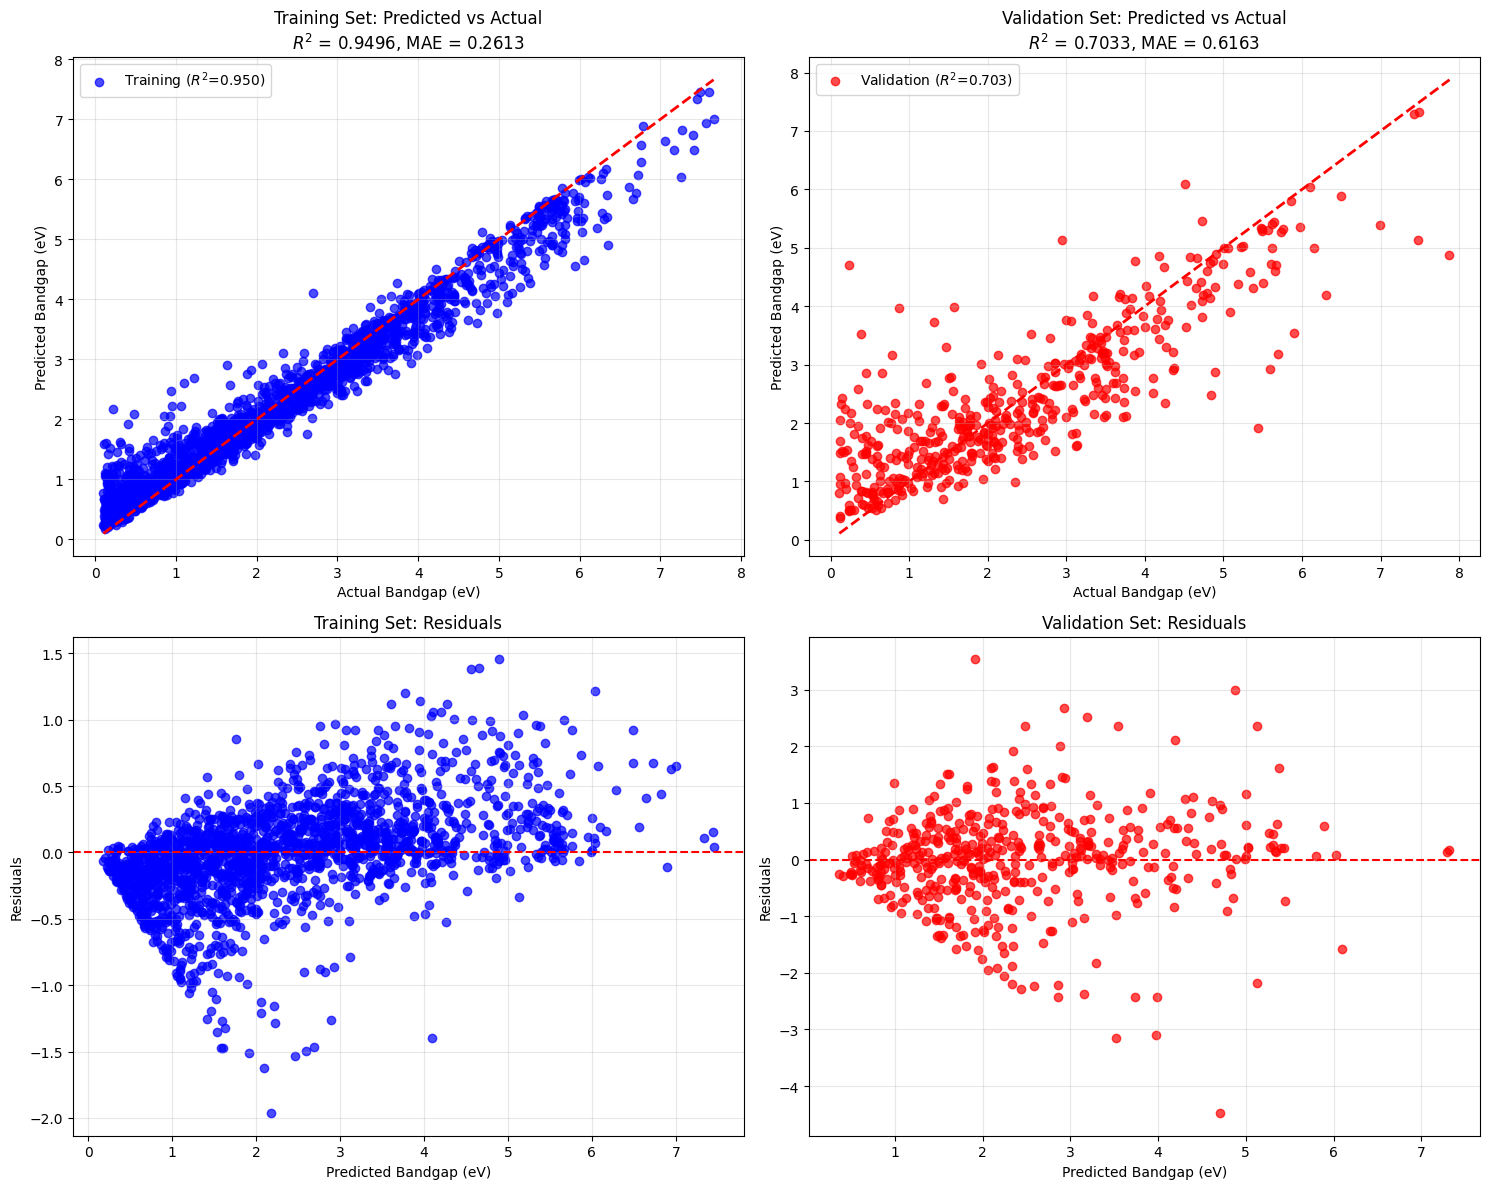

In [33]:
# --- 2. 绘制预测对比图与残差图 | Plot Predicted vs Actual & Residuals ---
# 创建 2x2 的画布显示四个关键图表
# Create a 2x2 canvas to display four key charts
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# --- 图 2 (左): 训练集预测对比 | Plot 2 (Left): Training Predicted vs Actual ---
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.7, color='blue', label=f'Training ($R^2$={train_r2:.3f})')
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_title(f'Training Set: Predicted vs Actual\n$R^2$ = {train_r2:.4f}, MAE = {train_mae:.4f}')
axes[0, 0].set_xlabel('Actual Bandgap (eV)')
axes[0, 0].set_ylabel('Predicted Bandgap (eV)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# --- 图 2 (右): 验证集预测对比 | Plot 2 (Right): Validation Predicted vs Actual ---
axes[0, 1].scatter(y_val, y_val_pred, alpha=0.7, color='red', label=f'Validation ($R^2$={val_r2:.3f})')
axes[0, 1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0, 1].set_title(f'Validation Set: Predicted vs Actual\n$R^2$ = {val_r2:.4f}, MAE = {val_mae:.4f}')
axes[0, 1].set_xlabel('Actual Bandgap (eV)')
axes[0, 1].set_ylabel('Predicted Bandgap (eV)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# --- 图 3 (左): 训练集残差分布 | Plot 3 (Left): Training Residuals ---
# 残差 = 真实值 - 预测值 | Residuals = Actual - Predicted
axes[1, 0].scatter(y_train_pred, y_train - y_train_pred, alpha=0.7, color='blue')
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_title('Training Set: Residuals')
axes[1, 0].set_xlabel('Predicted Bandgap (eV)')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].grid(True, alpha=0.3)

# --- 图 3 (右): 验证集残差分布 | Plot 3 (Right): Validation Residuals ---
axes[1, 1].scatter(y_val_pred, y_val - y_val_pred, alpha=0.7, color='red')
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_title('Validation Set: Residuals')
axes[1, 1].set_xlabel('Predicted Bandgap (eV)')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


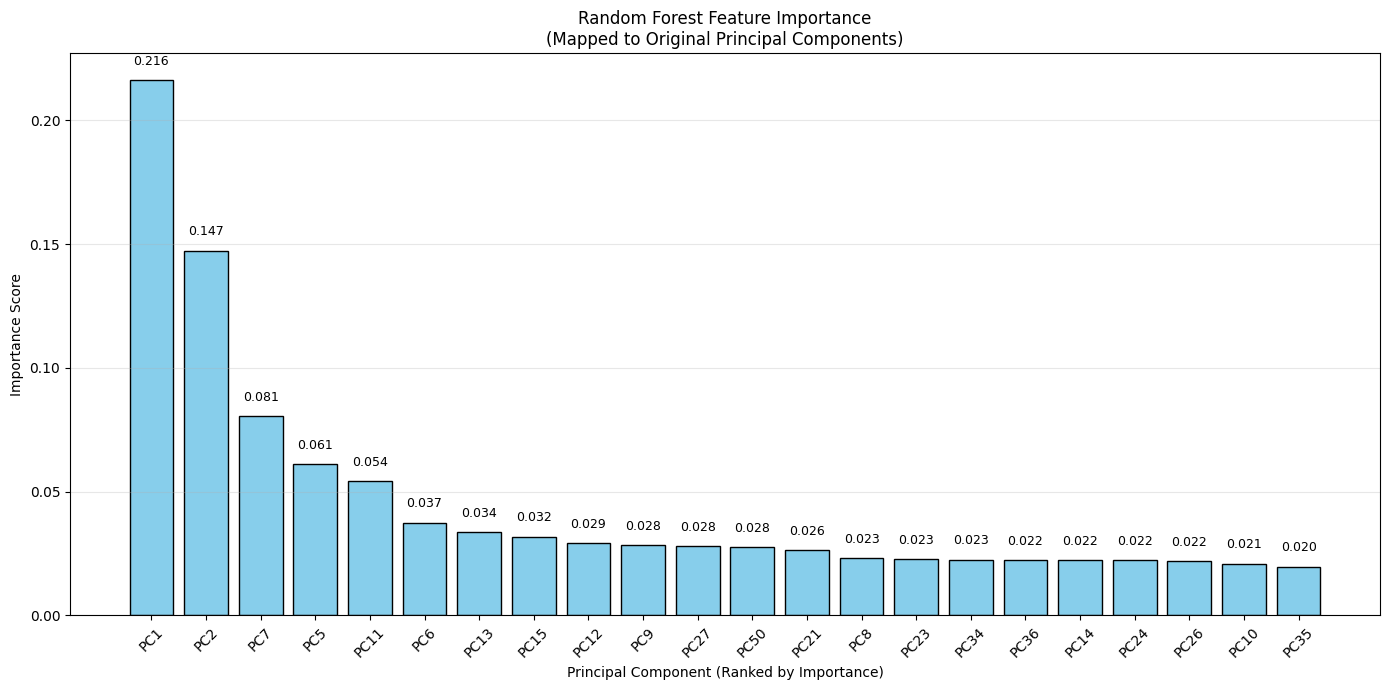

Top 5 Contributing Principal Components:
PC1: 0.2164
PC2: 0.1474
PC7: 0.0806
PC5: 0.0611
PC11: 0.0543


In [34]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. 提取真实的特征名称 | Extract True Feature Names ---
# 获取被选中特征在原始 60 个主成分中的索引
# Get the actual indices of the selected features from the original 60 PCs
selected_indices = selector.get_support(indices=True)

# 创建具体的 PC 标签名称（例如 PC1, PC2, PC5...）
# Create specific PC label names (e.g., PC1, PC2, PC5...)
pc_names = [f"PC{i+1}" for i in selected_indices]

# --- 2. 获取并排序重要性得分 | Get and Sort Importance Scores ---
importances = best_rf.feature_importances_

# 为了让图表更清晰，我们可以按重要性从高到低排序显示
# Sort for better visualization
sorted_idx = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_idx]
sorted_pc_names = [pc_names[i] for i in sorted_idx]

# --- 3. 绘制更新后的特征重要性图 | Plot Updated Feature Importance ---
plt.figure(figsize=(14, 7))
bars = plt.bar(range(len(sorted_importances)), sorted_importances, color='skyblue', edgecolor='black')

# 将横轴替换为真实的主成分名称
# Replace x-axis with actual Principal Component names
plt.xticks(range(len(sorted_importances)), sorted_pc_names, rotation=45)

plt.title(f'Random Forest Feature Importance\n(Mapped to Original Principal Components)')
plt.xlabel('Principal Component (Ranked by Importance)')
plt.ylabel('Importance Score')

# 在柱状图上方标注具体数值
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.3f}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 打印前 5 个最重要的成分及其物理贡献
print("Top 5 Contributing Principal Components:")
for i in range(5):
    print(f"{sorted_pc_names[i]}: {sorted_importances[i]:.4f}")

# **2.8 Final Hold-out Test Evaluation**

--- Final Hold-out Test Performance (600 samples) ---
Final R² Score: 0.6920
Final MAE: 0.6530 eV
Final RMSE: 0.9198 eV


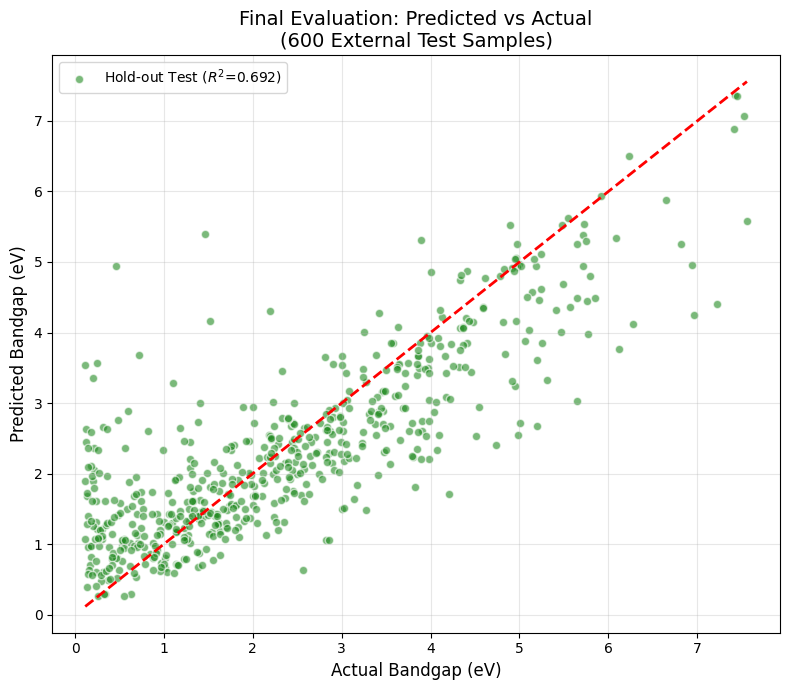

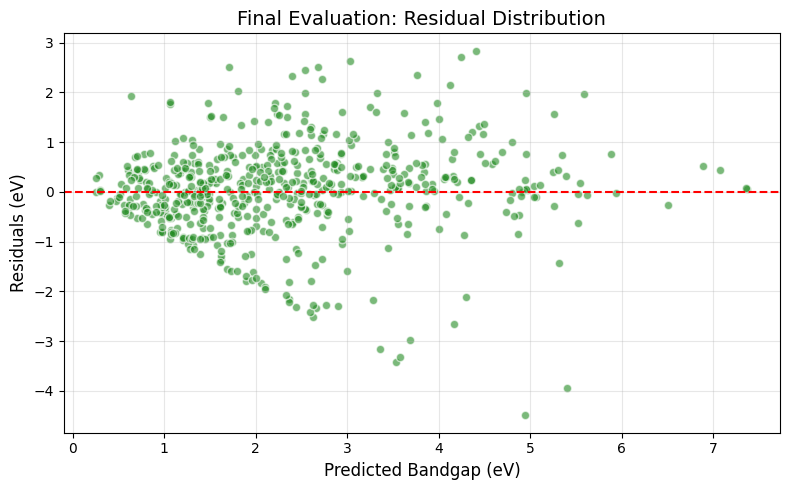

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --- 1. 数据转化流水线 (确保维度对齐为 22) | Data Transformation Pipeline ---
# 必须使用在训练集上 fit 过的对象进行 transform
# Must use objects fitted on training data to transform test data
X_test_scaled = scaler.transform(X_test_raw)
X_test_pca = pca.transform(X_test_scaled)
X_test_selected = selector.transform(X_test_pca)

# --- 2. 执行最终预测 | Final Prediction ---
y_test_pred = best_rf.predict(X_test_selected)

# --- 3. 计算最终评价指标 | Calculate Final Metrics ---
test_r2 = r2_score(y_test_true, y_test_pred)
test_mae = mean_absolute_error(y_test_true, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))

print(f"--- Final Hold-out Test Performance (600 samples) ---")
print(f"Final R² Score: {test_r2:.4f}")
print(f"Final MAE: {test_mae:.4f} eV")
print(f"Final RMSE: {test_rmse:.4f} eV")

# --- 4. 可视化：预测值 vs 真实值 (图 2 补充) | Visualization: Predicted vs Actual ---
plt.figure(figsize=(8, 7))
plt.scatter(y_test_true, y_test_pred, alpha=0.6, color='forestgreen', edgecolors='w', label=f'Hold-out Test ($R^2$={test_r2:.3f})')

# 绘制 45 度参考线 | Plot 45-degree reference line
min_val = min(y_test_true.min(), y_test_pred.min())
max_val = max(y_test_true.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.title(f'Final Evaluation: Predicted vs Actual\n(600 External Test Samples)', fontsize=14)
plt.xlabel('Actual Bandgap (eV)', fontsize=12)
plt.ylabel('Predicted Bandgap (eV)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- 5. 可视化：最终残差图 (图 3 补充) | Visualization: Final Residuals ---
plt.figure(figsize=(8, 5))
residuals = y_test_true - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.6, color='forestgreen', edgecolors='w')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Final Evaluation: Residual Distribution', fontsize=14)
plt.xlabel('Predicted Bandgap (eV)', fontsize=12)
plt.ylabel('Residuals (eV)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()